<a href="https://colab.research.google.com/github/derekedgar23/Texas_Tech_Football_2024_Public/blob/main/NBA_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/NBA_2021.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,...,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
701,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
703,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [2]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,703.000000,705.000000,705.000000,670.000000,...,676.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,25.870922,37.368794,16.941844,19.435887,3.166099,6.944681,0.443486,0.959858,2.714043,0.314542,...,0.751893,0.805816,2.774043,3.579291,1.933617,0.612199,0.416170,1.073759,1.622979,8.616596
std,4.094976,21.269180,21.603760,9.155005,2.278288,4.718210,0.112544,0.877718,2.227645,0.128540,...,0.146596,0.729362,1.818019,2.384859,1.813998,0.393439,0.408948,0.812583,0.761734,6.272808
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,19.000000,0.000000,12.500000,1.400000,3.500000,0.397000,0.200000,0.900000,0.271000,...,0.682750,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,25.000000,37.000000,5.000000,19.300000,2.600000,5.900000,0.439000,0.700000,2.200000,0.338000,...,0.775000,0.600000,2.500000,3.100000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,28.000000,57.000000,29.000000,26.900000,4.300000,9.300000,0.495500,1.500000,4.100000,0.388000,...,0.845000,1.000000,3.700000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.700000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [31]:
x = df[['Age']]
y = df['MP']

In [14]:
model = LinearRegression()

In [18]:
model.fit(x,y)

LinearRegression()

In [23]:
y_pred = model.predict(x)

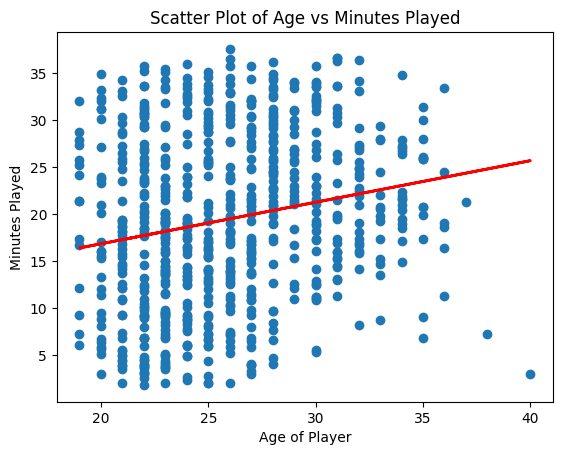

In [30]:
plt.scatter(df['Age'], df['MP'])
plt.xlabel('Age of Player')
plt.ylabel('Minutes Played')
plt.title('Scatter Plot of Age vs Minutes Played')
plt.plot(X['Age'], y_pred, color='red', linewidth=2)
plt.show()
